Back to the main [Index](index.ipynb) <a id="top"></a>

# Postprocessing tools for GW calculations

This notebook explains how to use AbiPy and `matplotlib` to visualize the results produced 
by the GW code. 
The self-energy code (`optdriver` 3) saves the final results in the `SIGRES.nc` file 
while the screening code (`optdriver` 4) stores the inverse dielectric matrix in the `SCR.nc` file.

## Table of Contents
[[back to top](#top)]

- [How to visualize QP corrections](#How-to-visualize-QP-corrections)
- [Plotting the spectral function](#Plotting-the-spectral-function)
- [Analyzing multiple SIGRES files with robots](#Analyzing-multiple-SIGRES-files-with-robots)

Let's start by importing the basic modules we'll need for this tutorial.

In [1]:
# Use this at the beginning of your script so that your code will be compatible with python3
from __future__ import print_function, division, unicode_literals

import warnings 
warnings.filterwarnings("ignore")  # Ignore warnings

from abipy import abilab
abilab.enable_notebook() # This line tells AbiPy we are running inside a notebook
import abipy.data as abidata

# This line tells the notebook to show plots inside of the notebook
%matplotlib notebook

## How to visualize QP corrections  
[[back to top](#top)]

As usual, we start by opening the netcdf file with abiopen:

In [2]:
sigres = abilab.abiopen(abidata.ref_file("tgw1_9o_DS4_SIGRES.nc"))
print(sigres)

================================= File Info =================================
Name: tgw1_9o_DS4_SIGRES.nc
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs
Size: 1005.34 kb
Access Time: Mon Feb 19 19:02:43 2018
Modification Time: Wed Nov  8 01:06:20 2017
Change Time: Wed Nov  8 01:06:20 2017

================================= Structure =================================
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.823046   3.823046   3.823046
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25

Abinit Spacegroup: spgid: 0, num_spatial_symmetries: 48, has_timerev: True, symmorphic: True

============================== Kohn-Sham bands ==============================
Number of electrons: 8.0, Fermi level: 6.236 [eV]
nsppol: 1, nkpt: 6, mband: 100, nspinor: 1, nspden: 1
smearing scheme: , tsmear_eV: 1.088, occopt: 1
Direct gap:
    Energy: 2.513 [eV]
    Initial state: sp

Let's have a look at the KS energies used to compute the Green's function $G_0$, the RPA screening $W_0$ 
and the $G_0W_0$ self-energy: 

<IPython.core.display.Javascript object>


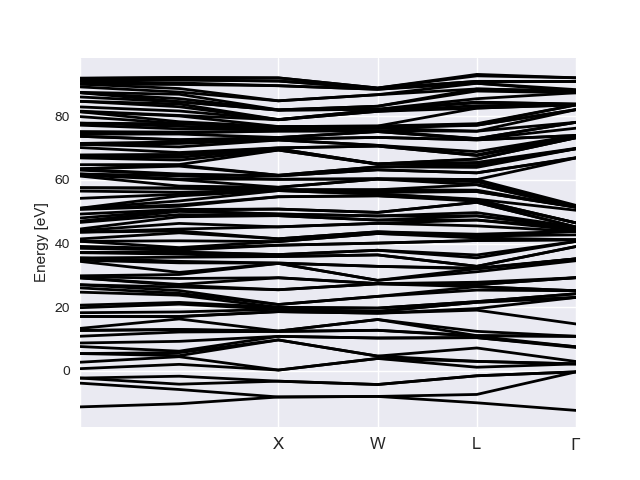

In [3]:
sigres.ebands.plot();

The SIGRES file contains the KS as well as the QP direct gaps for all the k-points 
included in the calculation (kptgw). To plot the different QP - KS, use:

<IPython.core.display.Javascript object>


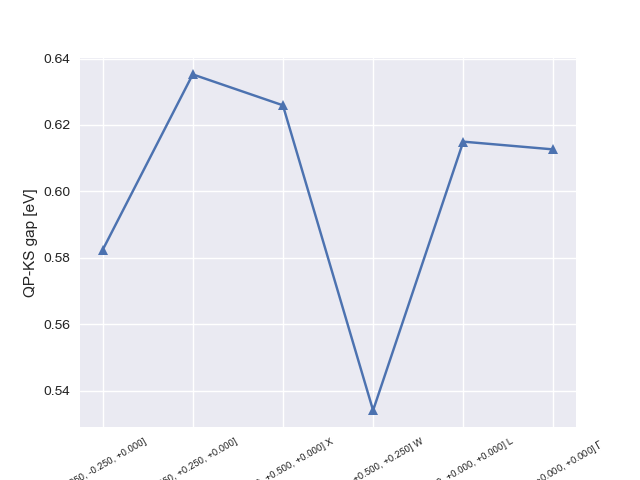

In [4]:
sigres.plot_qpgaps();

For the absolute QP gaps:

<IPython.core.display.Javascript object>


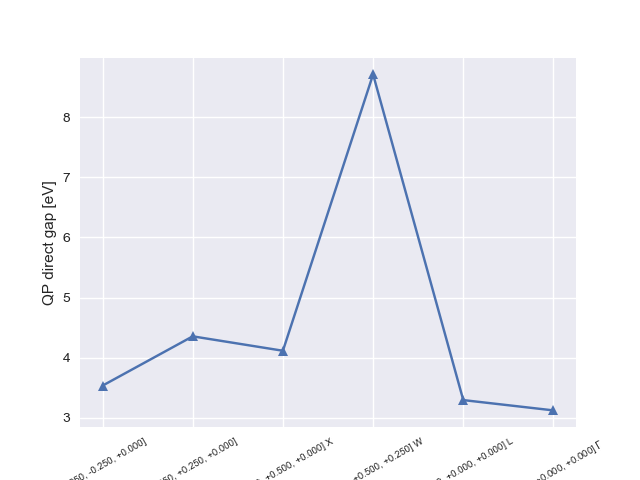

In [5]:
sigres.plot_qpgaps(plot_qpmks=False);

To plot the QP results as a function of the initial KS energy:

<IPython.core.display.Javascript object>


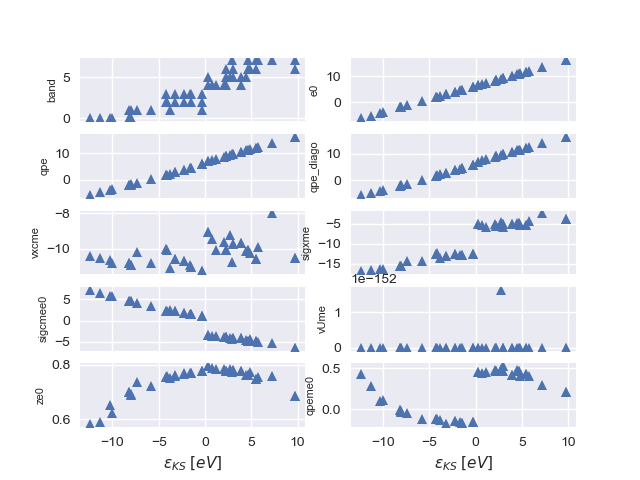

In [6]:
sigres.plot_qps_vs_e0(); #tight_layout=True);

and use `with_fields` to filter the quantity of interest:

<IPython.core.display.Javascript object>


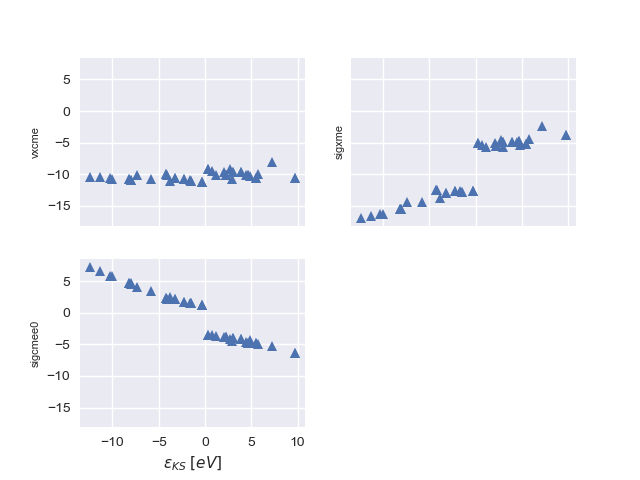

In [7]:
sigres.plot_qps_vs_e0(with_fields=["vxcme", "sigxme", "sigcmee0"], sharey=True);

To plot the QP energies on top of the KS energies used in the SIGMA run:

<IPython.core.display.Javascript object>


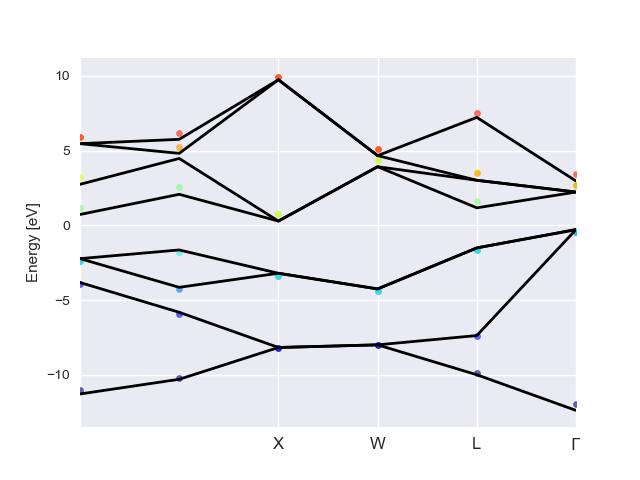

In [8]:
sigres.plot_qpbands_ibz();

To plot the KS band structure with markers whose size if proportional to the QP correction
and whose direction gives the sign of the correction:

<IPython.core.display.Javascript object>


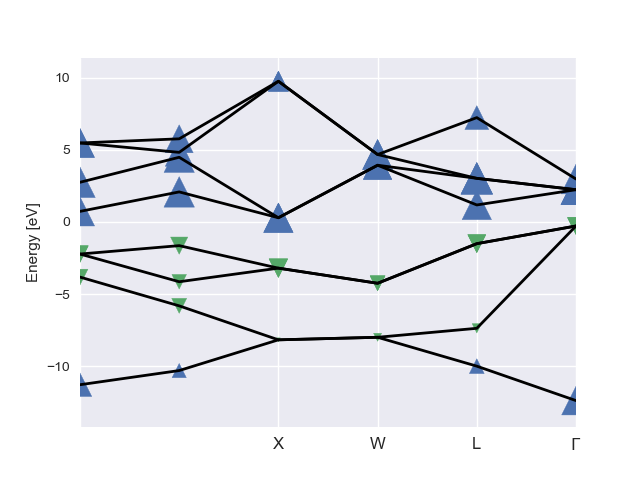

In [9]:
sigres.plot_ksbands_with_qpmarkers(fact=1000);

We can also plot the $<\Psi^{KS}_{mk}\,|\,\Psi^{QP}_{nk}>$ coeffiencients for given spin and k-point:

<IPython.core.display.Javascript object>


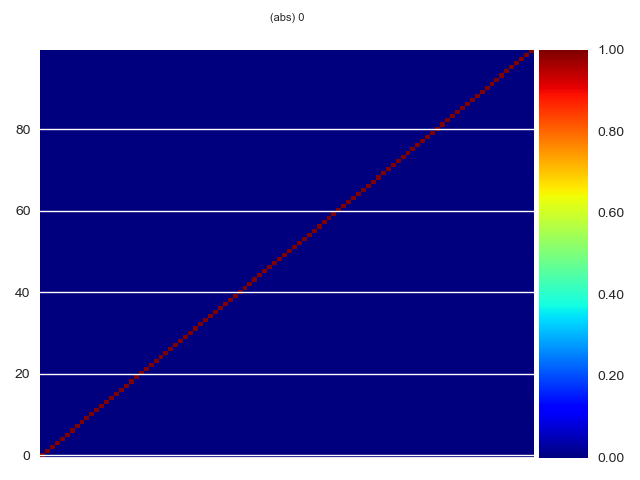

In [10]:
sigres.plot_eigvec_qp(spin=0, kpoint=0);

In this case, we have a diagonal matrix because the wavefunctions are not updated ($G_0W_0$).
The scenario is completely different if you start to perform self-consistent calculations with update 
of the QP amplitudes.

## Plotting the spectral function
[[back to top](#top)]

This examples shows how to plot the $G_0W_0$ spectral functions $A(\omega)$
at the $\Gamma$ point. See also lesson tgw2_4

<IPython.core.display.Javascript object>


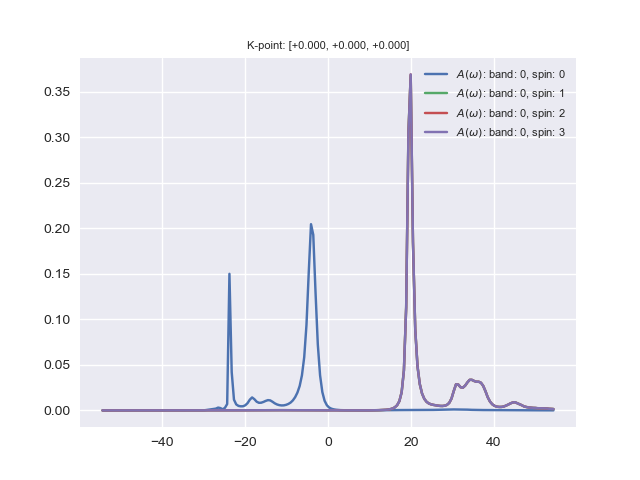

In [11]:
with abilab.abiopen(abidata.ref_file("al_g0w0_sigmaw_SIGRES.nc")) as al_sigres:
    # Plot A(w) for the first spin, the gamma point, and bands in [0,1,2,3]
    al_sigres.plot_spectral_functions();

## Analyzing multiple SIGRES files with robots
[[back to top](#top)]

To analyze the converge of the QP results, we can use the SigresRobot.
Let's build our robot from a list of SIGRES files.

In [12]:
# List of SIGRES files computed with different values of nband.
filenames = [
    "si_g0w0ppm_nband10_SIGRES.nc",
    "si_g0w0ppm_nband20_SIGRES.nc",
    "si_g0w0ppm_nband30_SIGRES.nc",
]

filepaths = [abidata.ref_file(fname) for fname in filenames]

robot = abilab.SigresRobot.from_files(filepaths)

Then we plot the converge of the QP direct gap as a function of the number of bands 
in the self-energy for all the k-points available in the netcdf files:

<IPython.core.display.Javascript object>


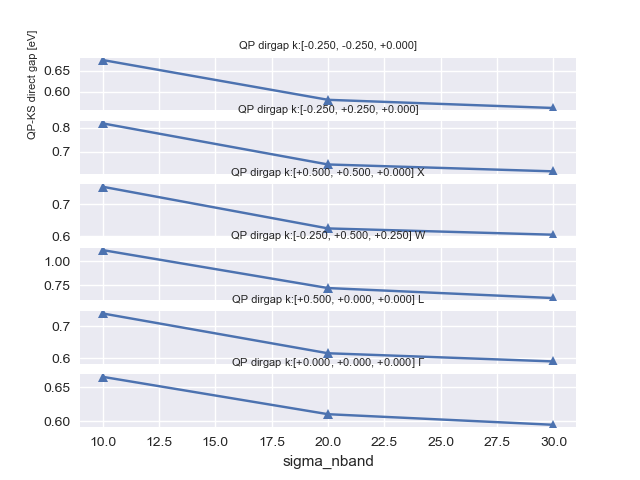

In [13]:
robot.plot_qpgaps_convergence(sortby="sigma_nband", sharey=False);

If we are interested in the convergence of the real/imaginary part of the self-energy 
and of the renormalization factor ...

<IPython.core.display.Javascript object>


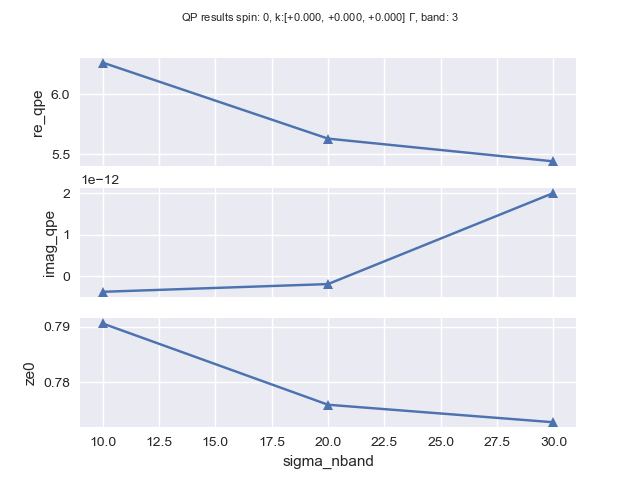

In [14]:
robot.plot_qpdata_conv_skb(spin=0, kpoint=(0, 0, 0), band=3, sortby="sigma_nband");

We can also plot the QP data as a function of the KS energies on the same figure with:

<IPython.core.display.Javascript object>


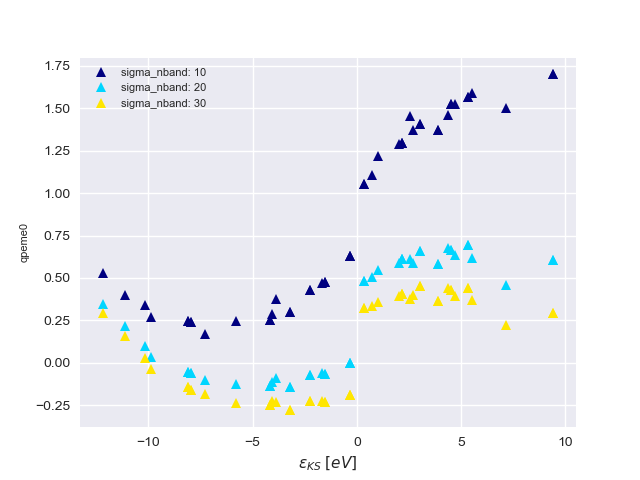

In [15]:
robot.plot_qpfield_vs_e0("qpeme0", sortby="sigma_nband");

In [16]:
#robot.get_qpgaps_dataframe(spin=0, kpoint=(0, 0, 0))

<div class="alert alert-info" role="alert">
Robots can also be constructed from the command line with: abicomp.py sigres FILES
</div>

Back to the main [Index](index.ipynb)